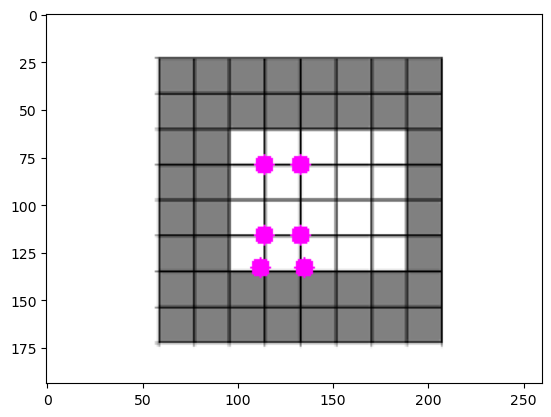

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("../imgs/corner.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cor= cv2.goodFeaturesToTrack(gray, 6, 0.01, 10)
cor= np.intp(cor)
for i in cor:
    x, y=i[0]
    cv2.circle(img,(x, y), 5, (255, 0, 255), -1)
plt.imshow(img[...,::-1])

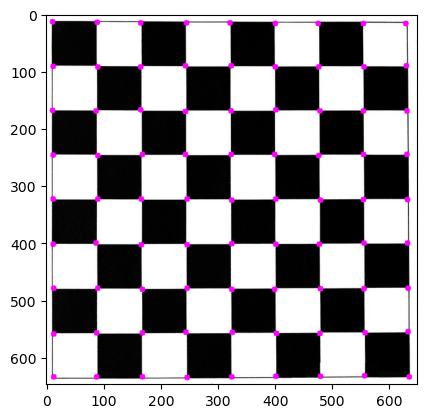

In [3]:
import cv2
import numpy as np

img = cv2.imread("../imgs/chess.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cor= cv2.goodFeaturesToTrack(gray, 81, 0.01, 10)
cor= np.intp(cor)
for i in cor:
    x, y=i[0]
    cv2.circle(img,(x, y), 5, (255, 0, 255), -1)
plt.imshow(img[...,::-1])

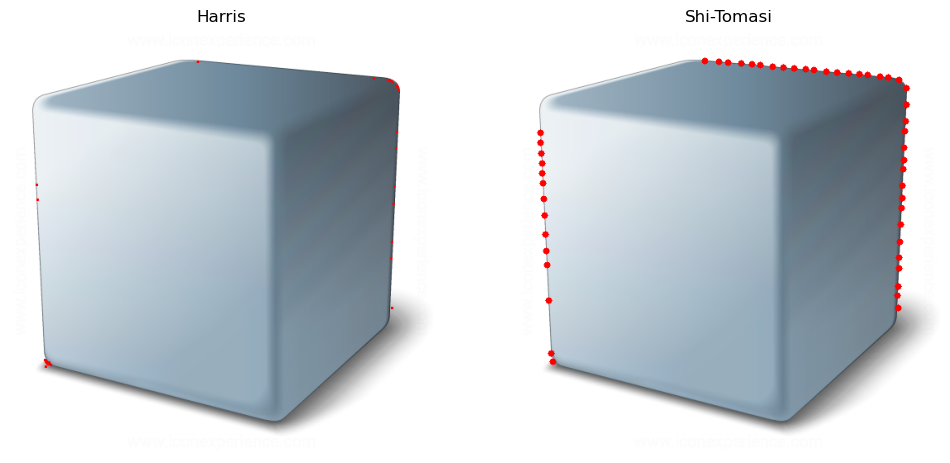

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("../imgs/cube.png")
img1 = img1.copy()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)

dst = cv2.cornerHarris(gray1, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
img1[dst > 0.01 * dst.max()] = [0, 0, 255]

img2 = cv2.imread("../imgs/cube.png")
img2 = img2.copy()
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray2,maxCorners=50,qualityLevel=0.01,minDistance=10)

if corners is not None:
    corners = np.intp(corners)
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img2, (x, y), 4, (0, 0, 255), -1)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(img1[..., ::-1])
plt.title("Harris")
plt.axis("off")

plt.subplot(122)
plt.imshow(img2[..., ::-1])
plt.title("Shi-Tomasi")
plt.axis("off")

plt.show()